# **My ML Project**

#**Load Dataset**

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


#**Data Preperation**

## **Data Seperation as X & y**

In [9]:
x = df.drop('logS',axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [10]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

##**Data Splitting**

In [11]:
from sklearn.model_selection import train_test_split

x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2, random_state=15)

In [19]:
1144*0.8 , 1144*0.2 #train & test size

(915.2, 228.8)

In [12]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
823,2.51990,158.241,6.0,0.000000
814,1.34960,116.160,3.0,0.000000
94,3.56622,180.250,0.0,0.857143
849,-2.88480,446.405,6.0,0.193548
1087,1.18690,86.134,0.0,0.000000
...,...,...,...,...
404,2.09050,259.762,5.0,0.375000
359,3.32360,152.196,0.0,0.833333
44,1.89260,80.130,0.0,0.000000
145,7.27400,360.882,1.0,0.666667


In [13]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
871,3.56170,230.909,0.0,0.545455
1119,2.16090,257.437,3.0,0.000000
300,2.33760,130.231,5.0,0.000000
781,-5.39720,342.297,4.0,0.000000
919,2.29840,169.611,1.0,0.545455
...,...,...,...,...
85,1.55900,102.177,4.0,0.000000
667,0.80220,28.054,0.0,0.000000
156,5.31380,257.547,1.0,0.800000
384,1.55042,231.299,2.0,0.647059


In [14]:
y_train

823    -3.170
814    -0.820
94     -5.220
849    -0.742
1087   -0.030
        ...  
404    -1.716
359    -3.960
44     -2.060
145    -7.390
653    -1.280
Name: logS, Length: 229, dtype: float64

In [15]:
y_test

871    -3.760
1119   -0.220
300    -1.980
781     0.358
919    -2.843
        ...  
85     -1.240
667    -0.400
156    -6.010
384    -0.364
645    -5.540
Name: logS, Length: 915, dtype: float64

# **Model Selection**

## **Linear regression**

### **Trainning the model**

In [52]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### **Applying the model for prediction**

In [26]:
y_train_predict = lr.predict(x_train)
y_test_predict = lr.predict(x_test)

In [27]:
y_train_predict

array([ -2.71816166,  -1.47616801,  -3.91498883,  -0.90189134,
        -1.03878982,  -6.55337773,  -3.36248088,  -2.7861831 ,
        -4.32942701,  -4.67560852,  -3.11080575,  -3.13215954,
        -6.36475705,  -5.66659525,  -1.20073304,  -1.77756764,
        -3.26289964,  -4.22193388,  -3.53096366,  -1.2960543 ,
        -2.69991505,  -1.00992422,  -0.70305625,  -0.98317563,
        -2.3666321 ,  -1.89032471,  -2.65450878,  -1.34658931,
        -1.53423559,   0.56215526,  -4.81886199,  -2.60093477,
        -1.44096687,  -0.99455484,  -1.47616801,  -7.71553723,
        -1.52410314,  -2.54358365,  -3.40902529,  -3.74448863,
        -2.57599882,  -3.59792747,  -3.3906827 ,  -7.03862157,
        -1.60334102,  -1.64886612,   0.45904842,  -0.82998045,
        -6.30197976,  -1.734466  ,  -4.81671341,  -0.50537421,
        -3.59096539,  -1.00822758,  -6.44867478,  -3.70942547,
        -6.03183847,  -2.8453719 ,  -5.93771343,  -2.73768396,
        -6.48824952,  -1.61774174,   0.08442073,  -3.86

In [28]:
y_test_predict

array([ -4.05934001,  -3.01122966,  -2.35904778,   1.80291567,
        -2.77848188,  -2.82757272,  -2.70362604,  -2.02279044,
        -2.07539602,  -2.29036806,  -0.99809513,  -8.94141644,
        -1.5973787 ,  -0.06805321,  -0.7281291 ,  -1.1596079 ,
        -1.42875541,  -2.00136306,  -5.39155652,  -5.06886309,
        -1.43957442,  -5.39167102,  -4.52219013,  -5.72709997,
        -3.41657872,  -4.05555808,  -2.05826976,  -2.70684335,
        -2.22073576,  -5.80460766,  -2.78842959,  -0.58037603,
        -4.25506315,   1.45242503,  -3.54615742,  -8.17470729,
        -2.64714212,  -1.79510417,  -4.30530886,  -2.57825051,
        -5.41275337,  -0.78785203,  -4.20543314,  -3.3395997 ,
        -7.2485871 ,  -7.54219305,  -2.08091641,  -1.03073808,
        -4.01310024,  -3.68919646,  -2.74322336,  -3.71740784,
        -0.70980449,   0.73097365,  -6.03442929,  -2.20843013,
        -4.2758691 ,  -2.70362604,  -1.30826869,  -4.91688808,
        -1.9056797 ,  -0.93309294,  -4.5000589 ,  -2.77

In [ ]:
y_train #Actual y train data

In [ ]:
y_train_predict #Predicted y train data

In [ ]:
y_test #Actual y test data

In [ ]:
y_test_predict #Predicted y test data

### **Evaluate the model**

In [44]:
from sklearn.metrics import mean_squared_error,r2_score

lr_train_mse = mean_squared_error(y_train,y_train_predict)
lr_train_r2 = r2_score(y_train,y_train_predict)

lr_test_mse = mean_squared_error(y_test,y_test_predict)
lr_test_r2 = r2_score(y_test,y_test_predict)

In [45]:
print('LR TRAIN MSE is:', lr_train_mse)
print('LR TRAIN R2 is :', lr_train_r2)
print('LR TEST MSE is:', lr_test_mse)
print('LR TEST R2 is:', lr_test_r2)

LR TRAIN MSE is: 0.934378496626164
LR TRAIN R2 is : 0.8066223355948733
LR TEST MSE is: 1.0436201824380025
LR TEST R2 is: 0.7559474209387245


In [67]:
lr_results = pd.DataFrame(['Linear Regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method','TRAIN MSE','TRAIN R2','TEST MSE','TEST R2']
lr_results

,Method,TRAIN MSE,TRAIN R2,TEST MSE,TEST R2
0,Linear Regression,0.934378,0.806622,1.04362,0.755947


## **Random Forest**

### **Trainning the model**

In [53]:
from sklearn.ensemble import RandomForestRegressor #Y column is Quantative

rf = RandomForestRegressor(max_depth=2, random_state=15)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=15)

### **Apply model for predicition**

In [54]:
y_train_predict = rf.predict(x_train)
y_test_predict = rf.predict(x_test)

### **Model Evaluation**

In [55]:
rf_train_mse = mean_squared_error(y_train,y_train_predict)
rf_train_r2 = r2_score(y_train,y_train_predict)

rf_test_mse = mean_squared_error(y_test,y_test_predict)
rf_test_r2 = r2_score(y_test,y_test_predict)

In [56]:
print('RF TRAIN MSE is:', rf_train_mse)
print('RF TRAIN R2 is :', rf_train_r2)
print('RF TEST MSE is:', rf_test_mse)
print('RF TEST R2 is:', rf_test_r2)

RF TRAIN MSE is: 0.9167960147209613
RF TRAIN R2 is : 0.8102611814132974
RF TEST MSE is: 1.087389766360164
RF TEST R2 is: 0.7457118198834747


In [66]:
rf_results = pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Method','TRAIN MSE','TRAIN R2','TEST MSE','TEST R2']
rf_results

,Method,TRAIN MSE,TRAIN R2,TEST MSE,TEST R2
0,Random Forest,0.916796,0.810261,1.08739,0.745712


## **Model Comparison**

In [62]:
lr_results

,Method,LR TRAIN MSE,LR TRAIN R2,LR TEST MSE,LR TEST R2
0,Linear Regression,0.934378,0.806622,1.04362,0.755947


In [63]:
rf_results

,Method,RF TRAIN MSE,RF TRAIN R2,RF TEST MSE,RF TEST R2
0,Random Forest,0.916796,0.810261,1.08739,0.745712


In [69]:
df1 = pd.concat([lr_results,rf_results],axis=0).reset_index(drop=True)
df1

,Method,TRAIN MSE,TRAIN R2,TEST MSE,TEST R2
0,Linear Regression,0.934378,0.806622,1.04362,0.755947
1,Random Forest,0.916796,0.810261,1.08739,0.745712


# **Data Visualization**

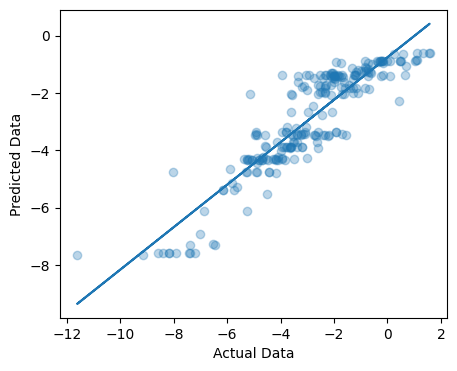

In [82]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,4))
z = np.polyfit(y_train, y_train_predict,1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train))
plt.scatter(x=y_train, y=y_train_predict,alpha=0.3)
plt.ylabel('Predicted Data')
plt.xlabel('Actual Data')
plt.show()